### Task 1 : Setup Environement

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:

# Checking PyTorch and CUDA
print("Torch version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())

Torch version: 2.7.0
CUDA Available: False


In [3]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

### Task 2 : Generate Random Noise

In [6]:
# random noise
noise = torch.randn(1, 100).to(device)
noise.shape

torch.Size([1, 100])

In [7]:
noise[0][:5]

tensor([-0.8873, -2.2460, -2.4802,  0.0538, -1.5020])

### Task 3: Generate a Simple Generator Model

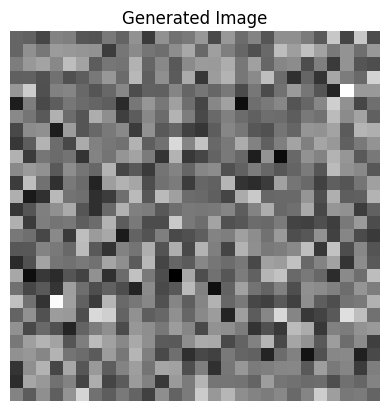

In [9]:
class SimpleGenerator(nn.Module):
    def __init__(self):
        super(SimpleGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),  # 28*28 = 784
            nn.Tanh()
        )
    
    def forward(self, x):
        x = self.model(x)
        return x.view(-1, 1, 28, 28)

# Initialize generator
generator = SimpleGenerator().to(device)

# Generate a fake image
fake_image = generator(noise)

# Show the image
plt.imshow(fake_image[0].detach().cpu().squeeze(), cmap="gray")
plt.title("Generated Image")
plt.axis("off")
plt.show()